## Credit Card Customer Churn Analysis

### Attribute Information

CLIENTNUM:Client number.<br>
Attrition_Flag:Internal event(customer activity) variable - if the account is closed then 1 else 0.<br>
Customer_Age:Customer's age in years.<br>
Gender:M = Male, F = Female.<br>
Dependent_count:Number of dependents.<br>
Education_Level:Educational qualification of the account holder.<br>
Marital_Status:Married, Single, Unknown.<br>
Income_Category:Annual income category of the account holder.<br>
Card_Category:Type of card.<br>
Months_on_book:Months on book(time of relationship).<br>
Total_Relationship_Count:Total number of products held by the customer.<br>
Months_Inactive_12_mon:Number of months inactive in the last 12 months.<br>
Contacts_Count_12_mon:Number of contacts in the last 12 months.<br>
Credit_Limit:Credit limit on the credit card.<br>
Total_Revolving_Bal:Total revolving balance on the credit card.<br>
Avg_Open_To_Buy:Open to buy credit line(average of last 12 months).<br>
Total_Amt_Chng_Q4_Q1:Change in transaction amount(Q4 over Q1).<br> 
Total_Trans_Amt:Total transaction amount(last 12 months).<br>
Total_Trans_Ct:Total transaction count(last 12 months).<br>
Total_Ct_Chng_Q4_Q1:Change in transaction count(Q4 over Q1).<br>
Avg_Utilization_Ratio:Average card utilization ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('BankChurners.csv')
df = data.copy()
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
#These two varibles seem to make no sense so I remove them.
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
df.columns = ['ID', 'Attrition', 'Age', 'Gender','Dependent', 'Education',
              'Marital_Status','Income', 'Card_Category', 'Months_on_book',
              'Total_Relationship_Count', 'Months_Inactive','Contacts',
              'Credit_Limit', 'Revolving_Bal','Avg_Open_To_Buy', 'Amt_Change_Q4_Q1',
              'Trans_Amt','Trans_Count', 'Count_Change_Q4_Q1', 'Avg_Utilization_Ratio']

In [7]:
print('Duplicates:',df.duplicated().sum())
print('Duplicates of ID:', df['ID'].duplicated().sum())

Duplicates: 0
Duplicates of ID: 0


In [8]:
df.drop('ID', axis = 1, inplace = True)

In [9]:
df.isna().sum()

Attrition                   0
Age                         0
Gender                      0
Dependent                   0
Education                   0
Marital_Status              0
Income                      0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts                    0
Credit_Limit                0
Revolving_Bal               0
Avg_Open_To_Buy             0
Amt_Change_Q4_Q1            0
Trans_Amt                   0
Trans_Count                 0
Count_Change_Q4_Q1          0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df1 = df.copy()

### Categorical Features

In [11]:
cate_feat = df1.dtypes[df1.dtypes == object].index.to_list()
cate_feat

['Attrition',
 'Gender',
 'Education',
 'Marital_Status',
 'Income',
 'Card_Category']

##### Attrition

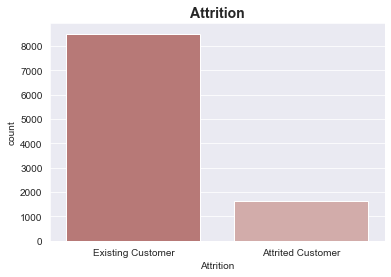

Existing Customer    8500
Attrited Customer    1627
Name: Attrition, dtype: int64

In [12]:
sns.set_style('darkgrid')
sns.set_palette('vlag_r')

sns.countplot(df1['Attrition'])
plt.title('Attrition', fontsize = 14, weight = 'bold')
plt.show()

df1['Attrition'].value_counts()

This data is highly imbalance.

##### Gender

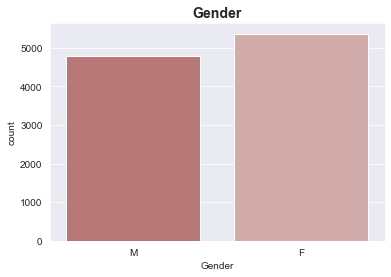

F    5358
M    4769
Name: Gender, dtype: int64

In [13]:
sns.countplot(df1['Gender'])
plt.title('Gender', fontsize = 14, weight = 'bold')
plt.show()

df1['Gender'].value_counts()

##### Education

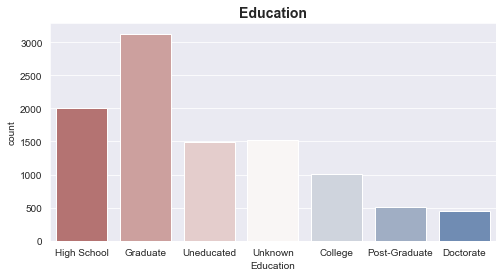

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education, dtype: int64

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(df['Education'],palette='vlag_r')
plt.title('Education', fontsize = 14, weight = 'bold')
plt.show()

df1['Education'].value_counts()

##### Marital Status

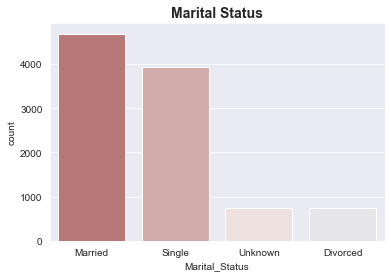

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [15]:
sns.countplot(df1['Marital_Status'])
plt.title('Marital Status', fontsize = 14, weight = 'bold')
plt.show()

df1['Marital_Status'].value_counts()

##### Income

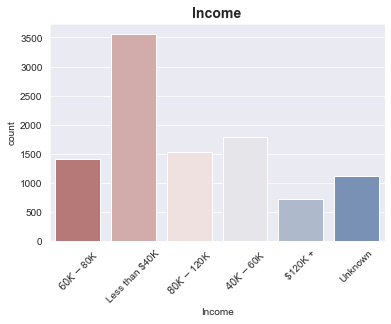

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income, dtype: int64

In [16]:
sns.countplot(df1['Income'])
plt.xticks(rotation = 45)
plt.title('Income', fontsize = 14, weight = 'bold')
plt.show()

df1['Income'].value_counts()

##### Card Category

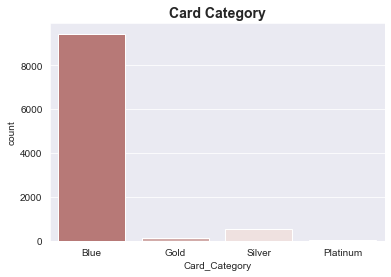

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [17]:
sns.countplot(df1['Card_Category'])
plt.title('Card Category', fontsize = 14, weight = 'bold')
plt.show()

df1['Card_Category'].value_counts()

##### Unknown Values

In [18]:
print("Count of 'Unknown' in Columns")
df1.isin(['Unknown']).sum()[df1.isin(['Unknown']).sum() > 0]

Count of 'Unknown' in Columns


Education         1519
Marital_Status     749
Income            1112
dtype: int64

In [19]:
print('Number of rows with "Unknown":',len(df1[(df1['Education'] == 'Unknown') | (df1['Marital_Status'] == 'Unknown') | (df1['Income'] == 'Unknown')]))

Number of rows with "Unknown": 3046


There are many unknown values in the 'Education', 'Marital_Status' and 'Income', they account for about 30% of entire data, so I won't remove them. 

##### Relation between Categorical Features and Attrition

In [20]:
print('[Attrition Rate]','\n')
for i in cate_feat[1:]:
    for j in range(len(np.unique(df1[i]))):
        print(i,[np.unique(df1[i])[j]],':',(df1[i][(df1[i] == np.unique(df1[i])[j]) 
              & (df1['Attrition'] == 'Attrited Customer')].count() / df1[i][df1[i] == np.unique(df1[i])[j]].count()* 100).round(2),'%',sep = '')

[Attrition Rate] 

Gender['F']:17.36%
Gender['M']:14.62%
Education['College']:15.2%
Education['Doctorate']:21.06%
Education['Graduate']:15.57%
Education['High School']:15.2%
Education['Post-Graduate']:17.83%
Education['Uneducated']:15.94%
Education['Unknown']:16.85%
Marital_Status['Divorced']:16.18%
Marital_Status['Married']:15.13%
Marital_Status['Single']:16.94%
Marital_Status['Unknown']:17.22%
Income['$120K +']:17.33%
Income['$40K - $60K']:15.14%
Income['$60K - $80K']:13.48%
Income['$80K - $120K']:15.77%
Income['Less than $40K']:17.19%
Income['Unknown']:16.82%
Card_Category['Blue']:16.1%
Card_Category['Gold']:18.1%
Card_Category['Platinum']:25.0%
Card_Category['Silver']:14.77%


1. Female clients have higher attrition rate than male clients.<br>
2. Attrition rate has positive correlation with education level.<br>
3. Single or divorced clients have higher attrition rate, but not significant.<br>
4. Clients with income less than 40k or more than 120k have the highest attrition rate, clients with income  between 60k to 80k have the lowest attrition rate.<br>
5. Attrition rate of platium card clients is the highest, silver card clients have the lowest attrition rate.

##### Dealing with Values

In [21]:
#Education
df1['Education'].replace(['Graduate', 'Post-Graduate', 'Doctorate'], 'Above College', inplace = True)

In [22]:
#Marital_Status
df1['Marital_Status'].replace('Divorced', 'Single', inplace = True)

In [23]:
#Income
df1['Income'].replace({'Less than $40K':'Less than 40K',
                       '$40K - $60K':'40K-60K',
                       '$60K - $80K':'60K-80K',
                       '$80K - $120K':'80K-120K',
                       '$120K +':'More than 120K'},
                      inplace = True)

### Numerical Features

In [24]:
num_feat = df1.dtypes[df1.dtypes != object].index.to_list()
num_feat

['Age',
 'Dependent',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive',
 'Contacts',
 'Credit_Limit',
 'Revolving_Bal',
 'Avg_Open_To_Buy',
 'Amt_Change_Q4_Q1',
 'Trans_Amt',
 'Trans_Count',
 'Count_Change_Q4_Q1',
 'Avg_Utilization_Ratio']

In [25]:
df1[num_feat].describe()

,Age,Dependent,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amt_Change_Q4_Q1,Trans_Amt,Trans_Count,Count_Change_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


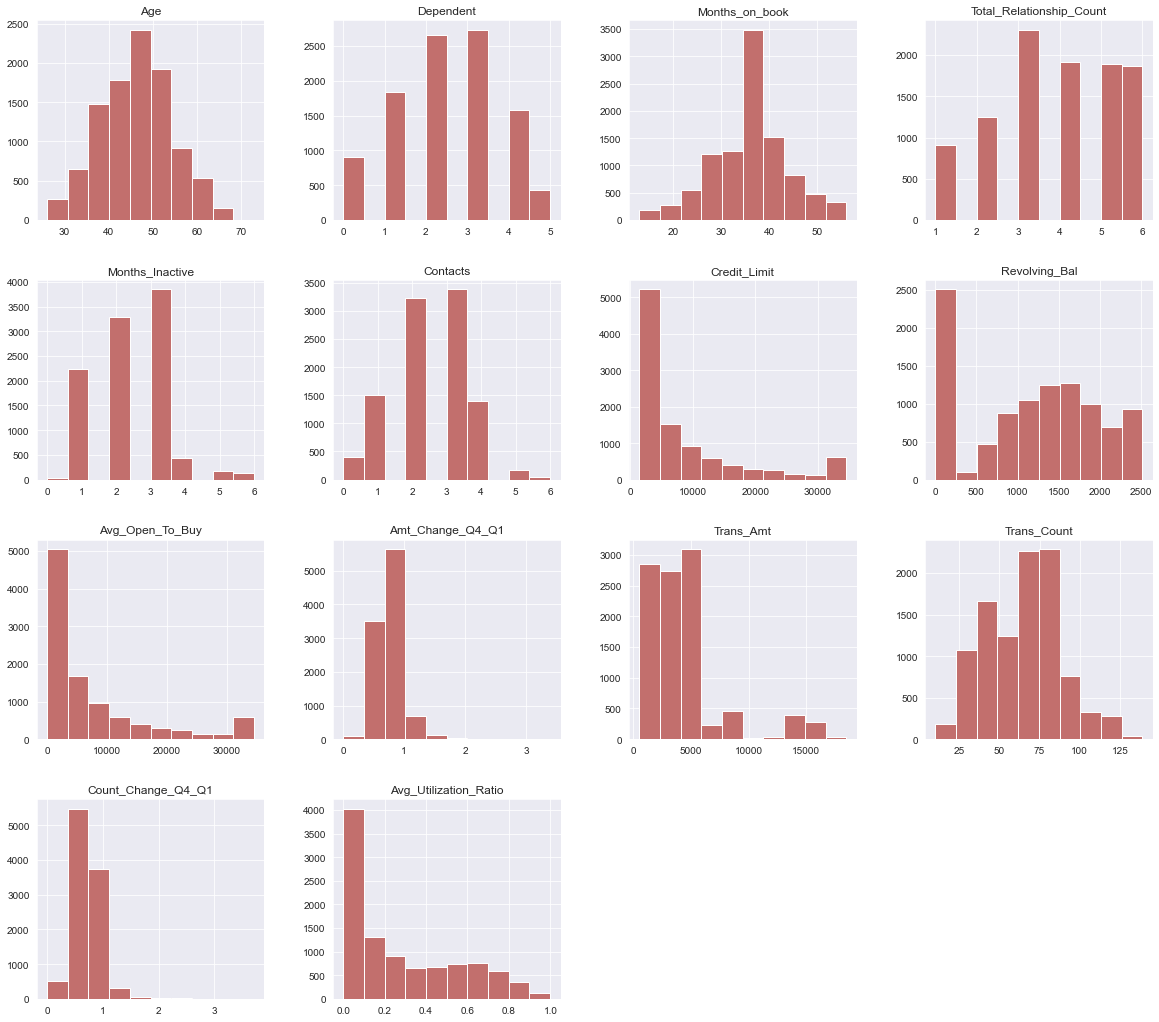

In [26]:
df1[num_feat].hist(figsize=(20,18))
plt.show()

##### Relation between Numerical Features and Attrition

In [27]:
feat_md = df1[num_feat].groupby(df1['Attrition']).median()

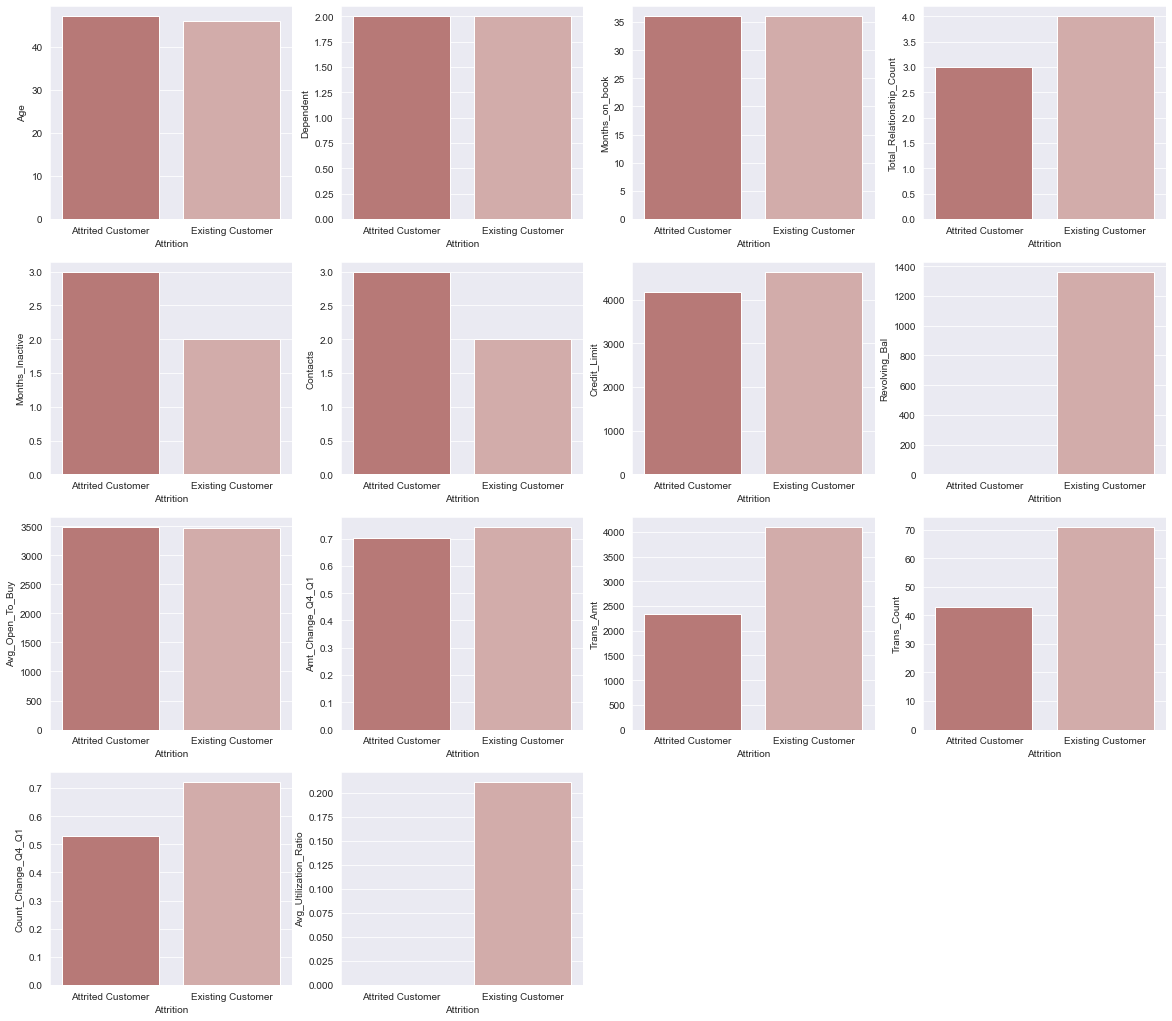

,Age,Dependent,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amt_Change_Q4_Q1,Trans_Amt,Trans_Count,Count_Change_Q4_Q1,Avg_Utilization_Ratio
Attrition,,,,,,,,,,,,,,
Attrited Customer,47.0,2.0,36.0,3.0,3.0,3.0,4178.0,0.0,3488.0,0.701,2329.0,43.0,0.531,0.000
Existing Customer,46.0,2.0,36.0,4.0,2.0,2.0,4643.5,1364.0,3469.5,0.743,4100.0,71.0,0.721,0.211


In [28]:
plt.figure(figsize=(20,18))
for i in range(len(num_feat)):
    plt.subplot(4,4,i+1)
    sns.barplot(x = feat_md.index, y = feat_md[num_feat[i]])
plt.show()

display(feat_md)

1. 'Total_Relationship_Count', 'Revolving_Bal', 'Trans_Amt', 'Trans_Count', 'Count_Change_Q4_Q1', and 'Avg_Utilization_Ratio' have negative correlation with attrition.<br>
2. 'Months_Inactive' and 'Contacts' have positive correlation with attrition.

In [29]:
df2 = df1.copy()

### Outlier

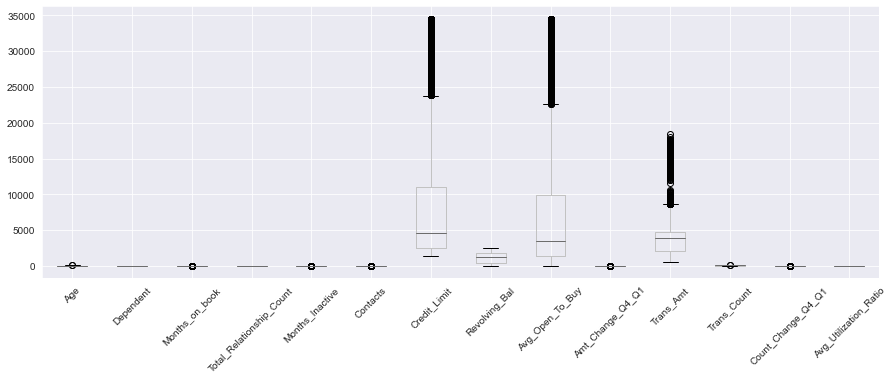

In [30]:
df2[num_feat].boxplot(figsize=(15,5))
plt.xticks(rotation = 45)
plt.show()

In [31]:
def remove_outlier(data,column):
    n = 3
    IQR = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    data = data[data[column] < np.percentile(data[column], 75) + n * IQR]
    data = data[data[column] > np.percentile(data[column], 25) - n * IQR]
    
    return data

In [32]:
for i in num_feat:
    df2 = remove_outlier(df2, i)

### Dummies

In [33]:
df2[cate_feat]

,Attrition,Gender,Education,Marital_Status,Income,Card_Category
5,Existing Customer,M,Above College,Married,40K-60K,Blue
9,Existing Customer,M,Above College,Single,80K-120K,Blue
10,Existing Customer,M,Uneducated,Unknown,More than 120K,Blue
11,Existing Customer,M,Unknown,Married,40K-60K,Blue
14,Existing Customer,F,Above College,Married,Less than 40K,Blue
...,...,...,...,...,...,...
10119,Attrited Customer,F,Uneducated,Single,Unknown,Blue
10123,Attrited Customer,M,Unknown,Single,40K-60K,Blue
10124,Attrited Customer,F,High School,Married,Less than 40K,Blue
10125,Attrited Customer,M,Above College,Unknown,40K-60K,Blue


In [34]:
df2['Attrition'] = pd.get_dummies(df2['Attrition'])['Attrited Customer']

In [35]:
df2['Gender'] = pd.get_dummies(df2['Gender'])['M']

In [36]:
df2 = pd.concat((df2, pd.get_dummies(df2['Education']).drop('Unknown', axis = 1)), axis = 1)

In [37]:
df2['Marital_Status'] = pd.get_dummies(df2['Marital_Status'])['Married']

In [38]:
df2 = pd.concat((df2, pd.get_dummies(df2['Income']).drop('Unknown', axis = 1)), axis = 1)

In [39]:
df2['Card_Category'] = pd.get_dummies(df2['Card_Category'])['Blue']

In [40]:
df2

,Attrition,Age,Gender,Dependent,Education,Marital_Status,Income,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amt_Change_Q4_Q1,Trans_Amt,Trans_Count,Count_Change_Q4_Q1,Avg_Utilization_Ratio,Above College,College,High School,Uneducated,40K-60K,60K-80K,80K-120K,Less than 40K,More than 120K
5,0,44,1,2,Above College,1,40K-60K,1,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1,0,0,0,1,0,0,0,0
9,0,48,1,2,Above College,0,80K-120K,1,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1,0,0,0,0,0,1,0,0
10,0,42,1,5,Uneducated,0,More than 120K,1,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,0,0,0,1,0,0,0,0,1
11,0,65,1,1,Unknown,1,40K-60K,1,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,0,0,0,0,1,0,0,0,0
14,0,57,0,2,Above College,1,Less than 40K,1,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,1,55,0,3,Uneducated,0,Unknown,1,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0,0,0,1,0,0,0,0,0
10123,1,41,1,2,Unknown,0,40K-60K,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,0,0,0,1,0,0,0,0
10124,1,44,0,1,High School,1,Less than 40K,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,1,0,0,0,0,1,0
10125,1,30,1,2,Above College,0,40K-60K,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,0,0,0,1,0,0,0,0


In [41]:
df3 = df2[['Attrition', 'Age', 'Dependent', 'Months_on_book', 'Total_Relationship_Count',
           'Months_Inactive', 'Contacts', 'Credit_Limit', 'Revolving_Bal', 'Avg_Open_To_Buy',
           'Amt_Change_Q4_Q1','Trans_Amt', 'Trans_Count', 'Count_Change_Q4_Q1', 'Avg_Utilization_Ratio',
           'Gender', 'Above College', 'College', 'High School', 'Uneducated', 'Marital_Status',
           'Less than 40K', '40K-60K', '60K-80K', '80K-120K', 'More than 120K', 'Card_Category']]
df3

,Attrition,Age,Dependent,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts,Credit_Limit,Revolving_Bal,Avg_Open_To_Buy,Amt_Change_Q4_Q1,Trans_Amt,Trans_Count,Count_Change_Q4_Q1,Avg_Utilization_Ratio,Gender,Above College,College,High School,Uneducated,Marital_Status,Less than 40K,40K-60K,60K-80K,80K-120K,More than 120K,Card_Category
5,0,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1,1,0,0,0,1,0,1,0,0,0,1
9,0,48,2,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1,1,0,0,0,0,0,0,0,1,0,1
10,0,42,5,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,1,0,0,0,1,0,0,0,0,0,1,1
11,0,65,1,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,1,0,0,0,0,1,0,1,0,0,0,1
14,0,57,2,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,1,55,3,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0,0,0,0,1,0,0,0,0,0,0,1
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0,0,0,0,1,0,0,0,1
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,0,1,0,1,1,0,0,0,0,1
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,1,0,0,0,0,0,1,0,0,0,1


### Collinearity

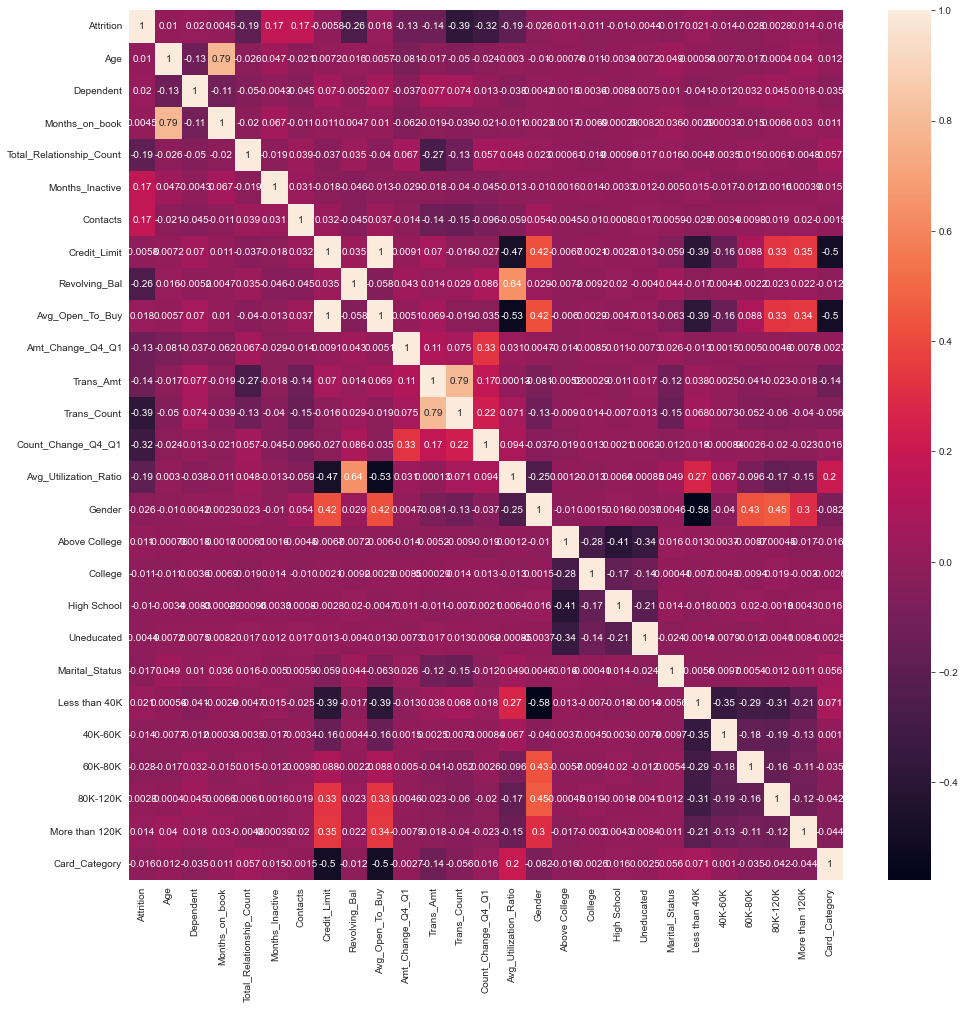

In [42]:
plt.figure(figsize=(16,16))
sns.heatmap(df3.corr(), annot = True)
plt.show()

'Avg_Open_To_Buy' is highly correlated with 'Credit_Limit', so I'll remove it.

In [43]:
df3.drop('Avg_Open_To_Buy', axis = 1, inplace = True)
num_feat.remove('Avg_Open_To_Buy')

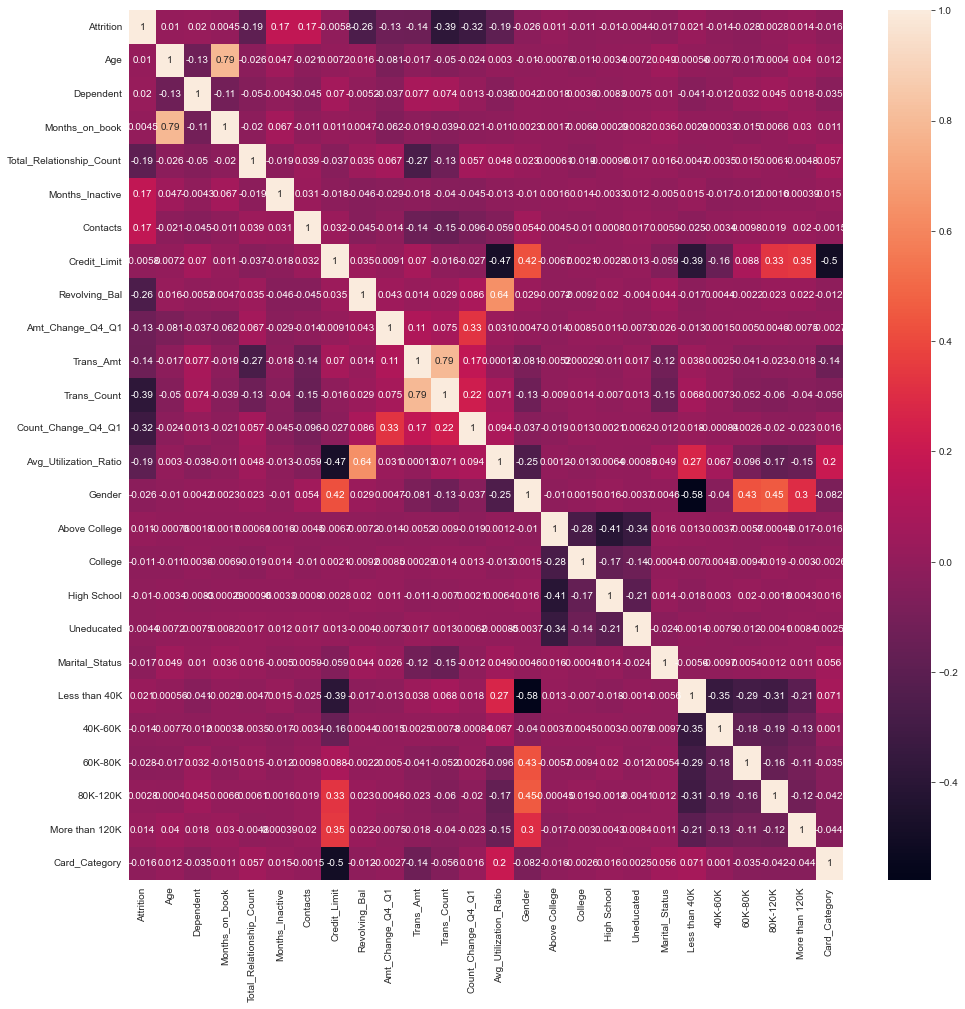

In [44]:
plt.figure(figsize=(16,16))
sns.heatmap(df3.corr(), annot = True)
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [46]:
features = df3.drop(['Attrition'], axis = 1).columns.to_list()

In [47]:
def VIF(data, variables):
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif[vif['Feature'] != 'const']
    
    return vif

In [48]:
VIF(df3, features).sort_values('VIF', ascending = False)

,Feature,VIF
23,80K-120K,3.695976
14,Gender,3.524228
22,60K-80K,3.407006
10,Trans_Amt,3.065829
13,Avg_Utilization_Ratio,3.027652
11,Trans_Count,2.954597
20,Less than 40K,2.933990
7,Credit_Limit,2.893898
1,Age,2.678904
3,Months_on_book,2.646471


### Modeling

In [49]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
X = df3.drop('Attrition', axis = 1)
y = df3['Attrition']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
print('X_train :', X_train.shape[0])
print('X_test :', X_test.shape[0])
print('y_train :', y_train.shape[0])
print('y_test :', X_test.shape[0])

X_train : 7257
X_test : 1815
y_train : 7257
y_test : 1815


In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = np.hstack((scaler.fit_transform(X_train[num_feat]),np.array(X_train.drop(num_feat, axis = 1))))
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.177053,-0.279489,0.254702,1.371277,-0.324750,0.497868,-0.578814,1.681576,-0.045616,-0.626894,-0.926528,-0.756785,1.878294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.303642,-1.051567,-0.379562,0.714812,-1.390652,0.497868,-0.761595,-1.396996,0.194707,0.668169,0.411988,-0.982625,-1.004505,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.202713,0.492589,0.000996,-0.598119,-1.390652,0.497868,1.424121,1.107937,-0.352411,0.663792,0.759011,0.084107,-0.650853,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.303642,-0.279489,-0.506414,0.058346,0.741153,0.497868,0.033928,1.681576,-0.142767,-0.634006,-1.025677,-0.257055,0.056450,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.582479,0.492589,0.000996,-0.598119,-0.324750,1.422861,0.243017,-0.551826,-1.329042,-1.183327,-1.818872,-0.127318,-0.765165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,0.582479,0.492589,1.142671,0.714812,-0.324750,0.497868,0.107132,0.142902,0.690693,0.122131,0.659862,0.055276,-0.511536,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7253,0.835656,0.492589,0.762112,1.371277,-1.390652,-0.427126,-0.673407,0.388747,-0.444449,0.449863,0.610287,-0.727955,1.271013,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7254,-0.683408,-1.051567,-0.760120,-0.598119,0.741153,-1.352119,-0.703604,-0.637443,1.309396,-0.258126,-1.223976,0.752015,0.088601,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7255,1.721777,-1.051567,2.030639,0.714812,0.741153,-0.427126,-0.651332,0.393640,-0.071182,-1.223268,-1.719723,-1.309371,1.099545,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
X_test_scaled = np.hstack((scaler.fit_transform(X_test[num_feat]),np.array(X_test.drop(num_feat, axis = 1))))
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.193651,0.524951,0.499624,-0.646623,-0.340608,0.524235,-0.570349,0.543582,2.101086,-1.228433,-1.261274,-0.479355,0.805535,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.777951,0.524951,0.010312,-0.646623,0.759399,1.440007,-0.659176,-1.416206,-0.411380,-0.774992,-1.007784,-1.901730,-1.019949,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.165253,-1.009326,1.722903,0.016065,0.759399,-0.391537,-0.739716,0.186590,0.575297,0.316171,0.563850,0.339588,1.920713,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.142301,1.292090,0.010312,0.016065,-1.440615,1.440007,-0.637521,-0.017580,-0.314747,-1.023491,-1.210576,-0.603872,0.599546,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.072201,1.292090,0.010312,1.341441,-1.440615,1.440007,-0.674091,0.362641,1.256816,0.963944,0.715943,0.483263,1.352469,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,-1.142301,0.524951,0.010312,-0.646623,-0.340608,1.440007,-0.727342,-1.416206,0.524437,-0.860989,-0.957087,-0.828962,-1.019949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1811,-1.871003,-1.776465,-2.191591,-0.646623,-0.340608,-2.223081,-0.480086,0.920135,-0.157082,0.282666,1.020131,0.741876,0.706092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1812,0.558002,1.292090,0.132640,-1.309311,0.759399,-0.391537,-0.394573,-0.291437,-1.067470,-0.814081,-0.602201,2.700635,-0.327402,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1813,1.165253,1.292090,1.355919,-1.971999,-1.440615,0.524235,-0.536210,0.834554,-0.101136,0.352469,0.969433,0.435371,0.887220,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


##### Oversampling

Because it's a imbalance data, I'll resample it and check accuracy of both of original and resampled data.

In [57]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train_scaled, y_train)

##### Logistic Regression

In [58]:
log_reg = LogisticRegression()

In [59]:
def log_model(train_x, train_y, test_x, test_y):
    log_reg.fit(train_x, train_y)
    
    print('score of train data :', log_reg.score(train_x, train_y))
    print('score of test data :', log_reg.score(test_x, test_y))
    print('-' * 50)
    
    y_pred = log_reg.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y, y_pred))
    print('-' * 50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [60]:
print('[Resample Data]\n')
log_model(X_train_res, y_train_res, X_test_scaled, y_test)

[Resample Data]

score of train data : 0.8764578473842053
score of test data : 0.8479338842975207
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1518
           1       0.52      0.83      0.64       297

    accuracy                           0.85      1815
   macro avg       0.74      0.84      0.77      1815
weighted avg       0.89      0.85      0.86      1815

--------------------------------------------------
Confusion Matrix : 

 [[1292  226]
 [  50  247]]


In [61]:
print('[Original Data]\n')
log_model(X_train_scaled, y_train, X_test_scaled, y_test)

[Original Data]

score of train data : 0.9064351660465757
score of test data : 0.8997245179063361
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1518
           1       0.72      0.63      0.67       297

    accuracy                           0.90      1815
   macro avg       0.83      0.79      0.81      1815
weighted avg       0.90      0.90      0.90      1815

--------------------------------------------------
Confusion Matrix : 

 [[1445   73]
 [ 109  188]]


##### KNN

In [62]:
def knn_model(train_x, train_y, test_x, test_y):
    KNN = KNeighborsClassifier(n_neighbors = 5)
    KNN.fit(train_x, train_y)
    
    print('score of train data :', KNN.score(train_x, train_y))
    print('score of test data :', KNN.score(test_x, test_y))
    print('-' * 50)
    
    y_pred = KNN.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y, y_pred))
    print('-' * 50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [63]:
print('[Resampled Data]\n')
knn_model(X_train_res, y_train_res, X_test_scaled, y_test)

[Resampled Data]

score of train data : 0.9520993002332556
score of test data : 0.8765840220385674
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1518
           1       0.58      0.88      0.70       297

    accuracy                           0.88      1815
   macro avg       0.78      0.88      0.81      1815
weighted avg       0.91      0.88      0.89      1815

--------------------------------------------------
Confusion Matrix : 

 [[1330  188]
 [  36  261]]


In [64]:
print('[Original Data]\n')
knn_model(X_train_scaled, y_train, X_test_scaled, y_test)

[Original Data]

score of train data : 0.9436406228469064
score of test data : 0.9278236914600551
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1518
           1       0.81      0.73      0.77       297

    accuracy                           0.93      1815
   macro avg       0.88      0.85      0.86      1815
weighted avg       0.93      0.93      0.93      1815

--------------------------------------------------
Confusion Matrix : 

 [[1468   50]
 [  81  216]]


##### Random Forest

In [65]:
def RF_model_res(train_x, train_y, test_x, test_y):
    rf = RandomForestClassifier(n_estimators = 200,
                                max_features = 15,
                                max_depth = 50,
                                random_state = 42)
    
    res_X, res_y = SMOTE(random_state=42).fit_resample(train_x, train_y)
    
    rf.fit(res_X, res_y)
    
    print('score of train data :', rf.score(train_x,train_y))
    print('score of test data :', rf.score(test_x,test_y))
    print('-'*50)
    
    y_pred = rf.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y,y_pred))
    print('-'*50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [66]:
print('[Resample Data]\n')
RF_model_res(X_train, y_train, X_test, y_test)

[Resample Data]

score of train data : 1.0
score of test data : 0.9608815426997245
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1518
           1       0.86      0.91      0.88       297

    accuracy                           0.96      1815
   macro avg       0.92      0.94      0.93      1815
weighted avg       0.96      0.96      0.96      1815

--------------------------------------------------
Confusion Matrix : 

 [[1474   44]
 [  27  270]]


In [67]:
def RF_model(train_x, train_y, test_x, test_y):
    rf = RandomForestClassifier(n_estimators = 200,
                                max_features = 15,
                                max_depth = 50,
                                random_state = 42)
    
    rf.fit(train_x, train_y)
    
    print('score of train data :', rf.score(train_x,train_y))
    print('score of test data :', rf.score(test_x,test_y))
    print('-'*50)
    
    y_pred = rf.predict(test_x)
    print('Classification Report :', '\n\n', classification_report(test_y,y_pred))
    print('-'*50)
    
    print('Confusion Matrix :', '\n\n', confusion_matrix(test_y, y_pred))

In [68]:
print('[Original Data]\n')
RF_model(X_train, y_train, X_test, y_test)

[Original Data]

score of train data : 1.0
score of test data : 0.9652892561983472
--------------------------------------------------
Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1518
           1       0.91      0.87      0.89       297

    accuracy                           0.97      1815
   macro avg       0.94      0.93      0.94      1815
weighted avg       0.96      0.97      0.96      1815

--------------------------------------------------
Confusion Matrix : 

 [[1494   24]
 [  39  258]]


##### Model Selection

The random forest models have the highest accuracy (97% and 96%) among the three models.<br>
Random forest model using original data has higher accuracy than using resampled data, but the model using resampled data is better at identifying attrited customer, I consider that the latter is more appopriate in this case.